In [5]:
import matplotlib.pylab as plt
import numpy as np
import pickle
def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

def load_dict(filename_):
    with open(filename_, 'rb') as f:
        ret_di = pickle.load(f)
    return ret_di
plt.figure()
traces = np.load("./sample/traces.npy")
labels = load_dict("./sample/labels.pkl")




<Figure size 640x480 with 0 Axes>

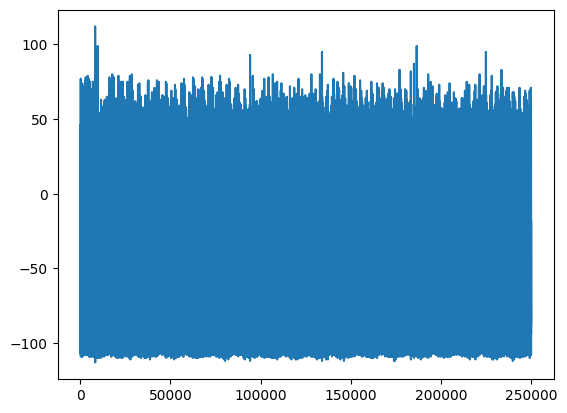

In [6]:
plt.plot(traces[0])

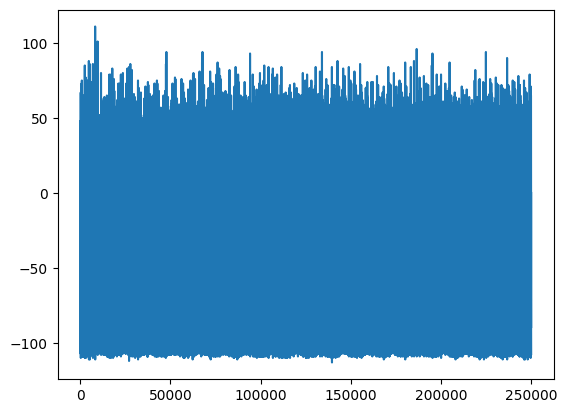

In [23]:
plt.plot(traces[1])

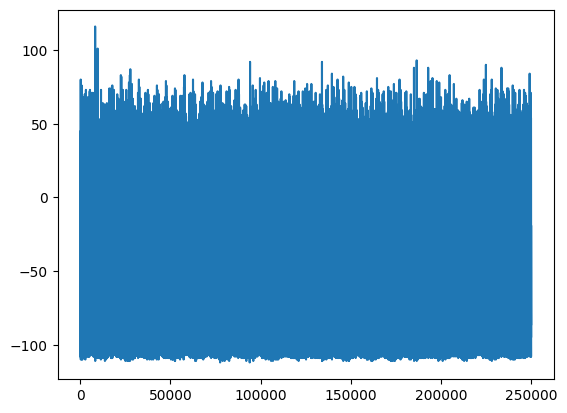

In [24]:
plt.plot(traces[2])

In [12]:
len(traces), len(labels)

(5000, 114)

labels[0]

In [21]:
labels['k_0']

array([173,  17,  34, ...,  34,  97, 161], dtype=uint16)

In [30]:
def target_variables(byte):
    """variables that will be profiled"""
    return ["rin", "rout"] + [
            f"{base}_{byte}" for base in ("x0", "x1", "xrin", "yrout", "y0", "y1")
            ]

In [36]:
"""Returns the SNR of the traces samples for each target variable."""
from tqdm import tqdm
from scalib.metrics import SNR
import scalib.modeling
import scalib.attacks
import scalib.postprocessing
snrs = {v: dict() for i in range(14) for v in target_variables(i)}
for v, m in tqdm(snrs.items(), total=len(snrs), desc="SNR Variables"):
    snr = SNR(np=1, nc=256, ns=traces.shape[1])
    x = labels[v].reshape((5000, 1))
    # Note: if the traces do not fit in RAM, you can call multiple times fit_u
    # on the same SNR object to do incremental SNR computation.
    snr.fit_u(traces, x)
    m["SNR"] = snr.get_snr()[0, :]
    # Avoid NaN in case of scope over-range
    np.nan_to_num(m["SNR"], nan=0.0)

SNR Variables: 100%|██████████| 86/86 [00:11<00:00,  7.79it/s]


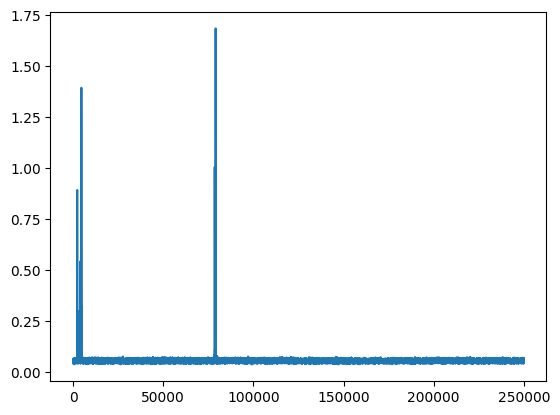

In [43]:
plt.plot(snrs['x0_0']['SNR'])

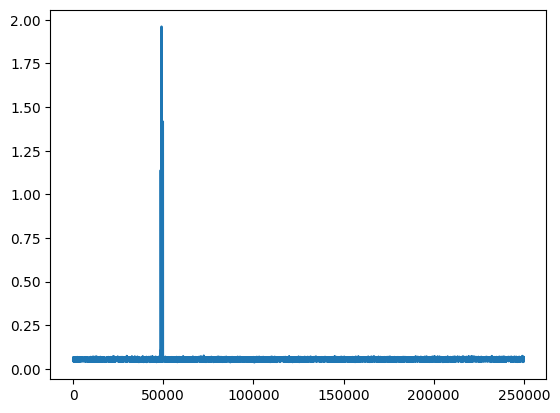

In [44]:
plt.plot(snrs['x0_1']['SNR'])

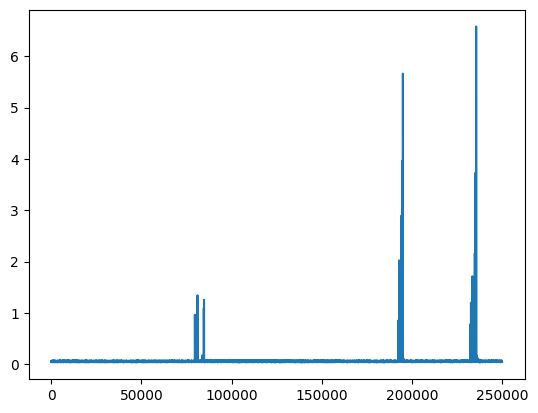

In [45]:
plt.plot(snrs['x1_0']['SNR'])

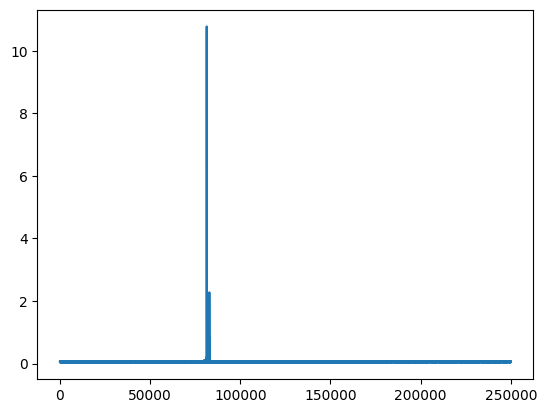

In [46]:
plt.plot(snrs['xrin_0']['SNR'])

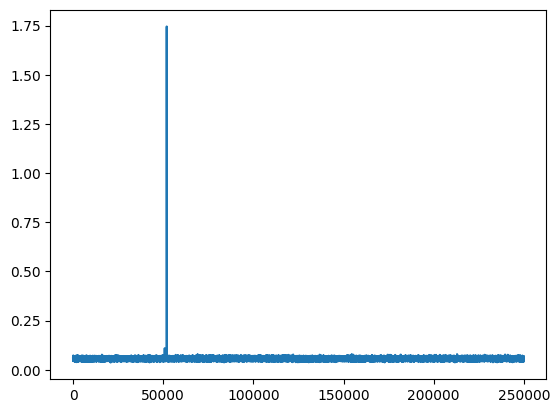

In [47]:
plt.plot(snrs['yrout_1']['SNR'])

In [52]:
from scalib.modeling import MultiLDA
import numpy as np
# 5000 traces with 50 points each
x = np.random.randint(0, 256, (5000,50),dtype=np.int16)

In [57]:
len(x[0]), len(x)

(50, 5000)

In [59]:
y = np.random.randint(0, 256, (5000, 5),dtype=np.uint16)

In [61]:
y[0]

array([ 66,   9, 224, 237,  82], dtype=uint16)

In [63]:
pois = [list(range(7*i, 7*i+10)) for i in range(5)]

In [64]:
pois

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [28, 29, 30, 31, 32, 33, 34, 35, 36, 37]]

In [65]:
lda = MultiLDA(5*[256], 5*[3], pois)

In [66]:
lda

In [72]:
from scalib.modeling import MultiLDA
import numpy as np
# 5000 traces with 50 points each
x = np.random.randint(0, 256, (5000,50),dtype=np.int16)
# 5 variables (8-bit), and 5000 traces
y = np.random.randint(0, 256, (5000, 5),dtype=np.uint16)
# 10 POIs for each of the 5 variables
pois = [list(range(7*i, 7*i+10)) for i in range(5)]
# Keep 3 dimensions after dimensionality reduction
lda = MultiLDA(5*[256], 5*[3], pois)
lda.fit_u(x, y)
lda.solve()
# Predict the class for 20 traces.
x = np.random.randint(0, 256, (20, 50), dtype=np.int16)
predicted_proba = lda.predict_proba(x)

In [76]:
predicted_proba

[array([[0.00274516, 0.00383155, 0.00452322, ..., 0.00470484, 0.00502419,
         0.00437224],
        [0.00236703, 0.00250708, 0.00552015, ..., 0.00567218, 0.00675587,
         0.00341747],
        [0.00462387, 0.00364737, 0.00407464, ..., 0.00367958, 0.00379488,
         0.00390251],
        ...,
        [0.0035712 , 0.00258202, 0.00526821, ..., 0.00441474, 0.00562195,
         0.00337524],
        [0.00337246, 0.00264093, 0.00481983, ..., 0.00500436, 0.00517953,
         0.00326419],
        [0.00393544, 0.00302186, 0.00476794, ..., 0.00392209, 0.00481137,
         0.00366   ]]),
 array([[0.00254431, 0.00419833, 0.00353325, ..., 0.00523737, 0.00285406,
         0.00354453],
        [0.00149727, 0.0055466 , 0.00244731, ..., 0.00663635, 0.00158436,
         0.00268091],
        [0.00498119, 0.01014746, 0.00257956, ..., 0.00496987, 0.00231005,
         0.00359805],
        ...,
        [0.00297511, 0.00443668, 0.00369261, ..., 0.00478624, 0.00307598,
         0.00404739],
        [0.0

In [77]:
x

array([[154,  78, 140, 127,  35,  72, 217, 161, 154,  91, 148,  70,  83,
        183, 201,   6,  11, 250,  44, 190,  64, 239, 152,  80,  71, 195,
        227, 169, 208,  41,   3,  34,  42,  88,  61,   4,  22, 110,  87,
        106, 115,  13,  99, 170,  12, 156, 231,  70, 255,   7],
       [218, 196,  14, 243,  39, 106, 194,   8, 205,  10, 144, 194, 209,
         96, 175,  64, 148, 179,  90, 172, 113, 181, 156, 152,  43,  88,
        223,  95, 137, 229, 218,  92, 117,  90, 100, 161,  24, 196, 238,
        177, 188,  33, 237, 233,  12, 233, 208,   7, 179, 121],
       [132, 171, 220,  59, 177, 239, 106,  58, 245,  99,  72,  41,  99,
        181,  42, 207, 182,  31, 144, 130, 252,  73, 106, 253, 171,  49,
        162, 165, 173,  13, 252,  67,  44,  86,   9,  87,  11, 172,  90,
        183, 207,  87,  80,  25, 238,  76,  89,  91,  59, 221],
       [184, 251, 158, 163,  69,  98,  24,  91,  53,   0, 196, 211, 112,
        186, 151,  45, 117, 150, 195, 241,   1, 224,  74, 197,  76,  12,
     

In [71]:
from scalib.modeling import LDAClassifier
import numpy as np
x = np.random.randint(0,256,(5000,10),dtype=np.int16)
y = np.random.randint(0,256,5000,dtype=np.uint16)
lda = LDAClassifier(256,3,10)
lda.fit_u(x,y, 0)
lda.solve()
x = np.random.randint(0,256,(20,10),dtype=np.int16)
predicted_proba = lda.predict_proba(x)

In [67]:
x = np.random.randint(0,256,(5000,10),dtype=np.int16)
y = np.random.randint(0,256,5000,dtype=np.uint16)

In [68]:
x

array([[207, 204,  64, ..., 247, 231,  20],
       [235, 134, 109, ...,  13,  19, 135],
       [107,  51, 143, ..., 117,  11,   8],
       ...,
       [114,  67,  88, ..., 149, 134, 191],
       [234, 197, 140, ...,  22, 105, 203],
       [ 86, 250, 104, ..., 198,  55,  37]], dtype=int16)

In [69]:
y

array([ 47,  65, 108, ..., 204,  66, 177], dtype=uint16)

In [70]:
lda